In [54]:
import pandas as pd

website_traffic = pd.read_csv("website_traffic.csv")
website_traffic

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0


In [55]:
website_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


In [56]:
# Calculate the correlation coefficients
website_traffic.corr(numeric_only=True)["Conversion Rate"]

Page Views          0.126635
Session Duration    0.177798
Bounce Rate        -0.049051
Time on Page        0.229669
Previous Visits     0.109496
Conversion Rate     1.000000
Name: Conversion Rate, dtype: float64

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans

# Select features with a positive correlation
selected_features = ["Page Views", "Session Duration", "Time on Page", "Previous Visits"]
X = website_traffic[selected_features]
# The Conversion Rate column will be the target variable for prediction.
y = website_traffic["Conversion Rate"]

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.031691679454020995


In [61]:
#Interpret the MAE value

#The Mean Absolute Error (MAE) for the linear regression model was calculated to be 0.0317. 
#Given that the Conversion Rate typically ranges between 0 and 1, an MAE of 0.0317 indicates that the model's predictions are, on average, very close to the actual values. 
#This suggests that the linear regression model is performing well in predicting Conversion Rates, capturing most of the essential patterns in the data.

C:\Anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans

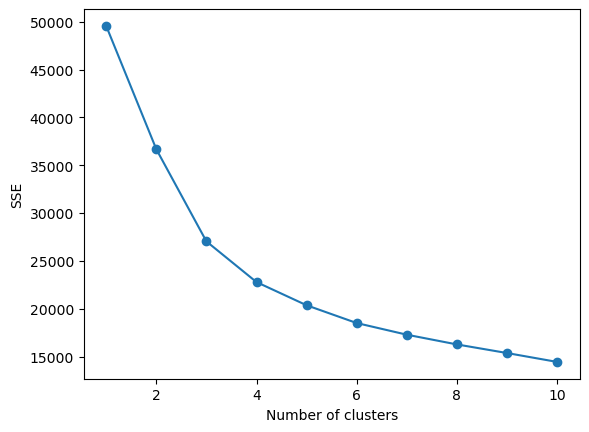

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use the Elbow Method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [67]:
# Assuming the optimal number of clusters is determined as 5
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the original dataset
website_traffic['Cluster'] = clusters

C:\Anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [68]:
website_traffic

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate,Cluster
0,5,11.051381,0.230652,Organic,3.890460,3,1.0,4
1,4,3.429316,0.391001,Social,8.478174,0,1.0,0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0,0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0,1
4,5,4.235843,0.291541,Paid,1.960654,5,1.0,1
...,...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0,3
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0,3
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0,4
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0,3


In [69]:
# Calculate the mean value of each feature for each cluster
cluster_means = website_traffic.groupby('Cluster').mean(numeric_only=True)
cluster_means


,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
Cluster,,,,,,
0,4.863636,2.203504,0.293055,8.841560,1.960227,1.000000
1,4.376855,5.563189,0.287762,3.100685,2.000000,0.997210
2,7.377551,1.743790,0.285030,2.988443,2.118367,0.987102
3,3.519766,1.404676,0.282421,2.812258,1.904832,0.958113
4,5.036232,11.447904,0.266982,3.714557,1.840580,1.000000


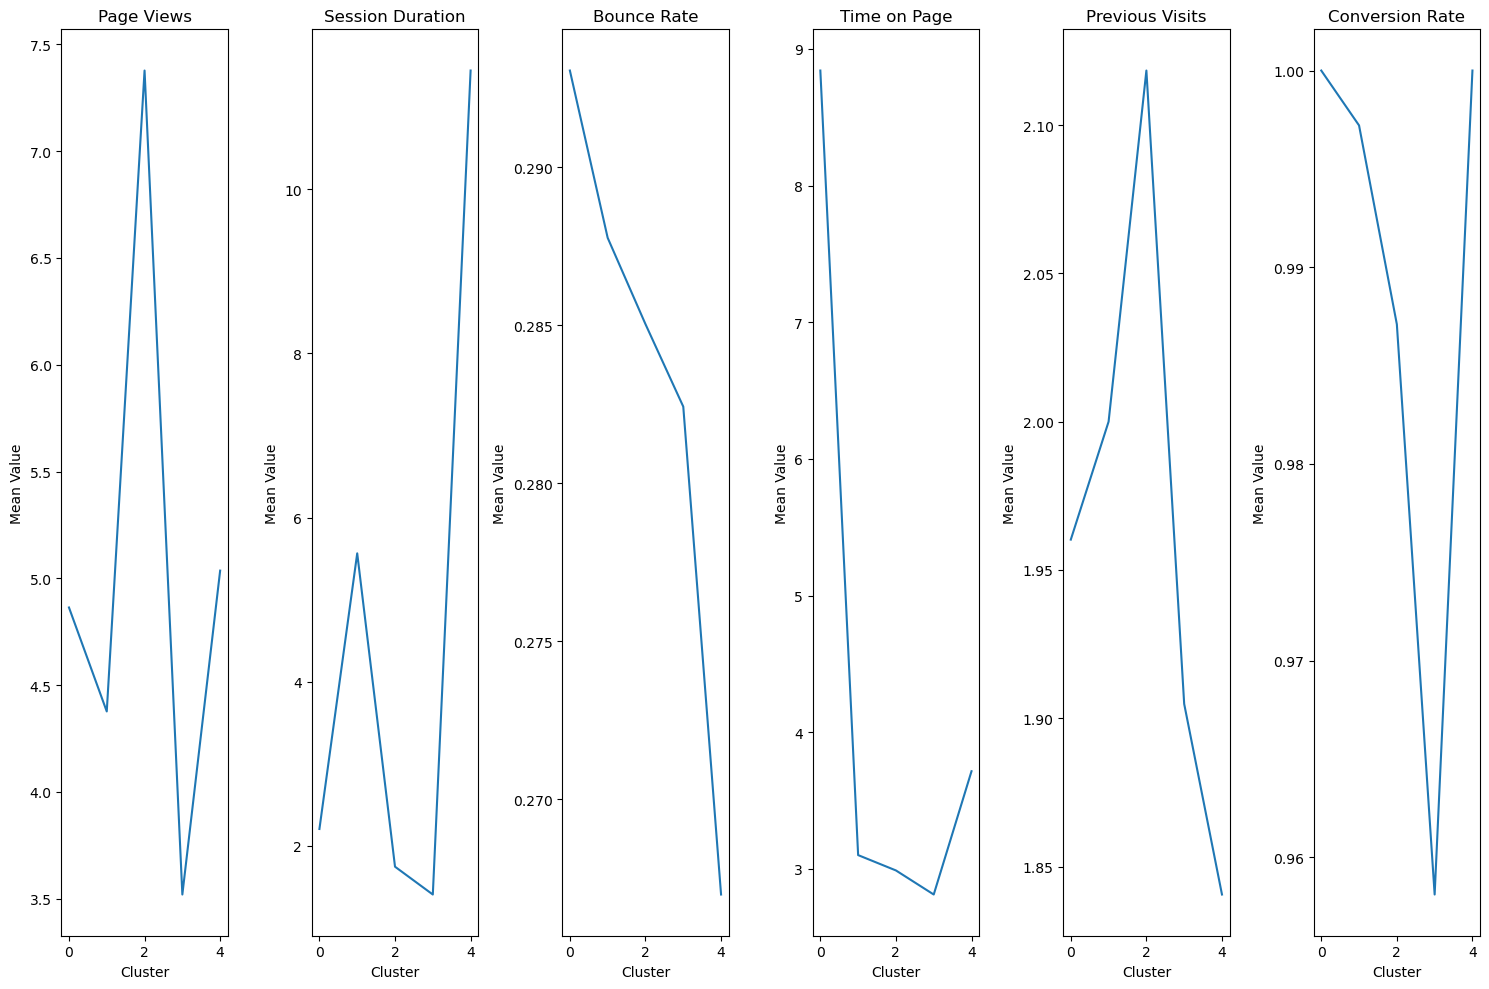

In [70]:
# Plotting
features = cluster_means.columns
num_features = len(features)

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(1, num_features, i + 1)
    plt.plot(cluster_means.index, cluster_means[feature])
    plt.title(feature)
    plt.xlabel('Cluster')
    plt.ylabel('Mean Value')

plt.tight_layout()
plt.show()

In [ ]:
#Analyse the results to identify distinct patterns and insights within the data

#Cluster 0 has the highest bounce rate, time on page and conversion rate. This suggests that the users in Cluster 0 might be highly targeted, meaning they know exactly what they want from the site. They visit the page, spend time engaging with the content, complete their goal, and then leave. Since they don't need to browse further, they contribute to a high bounce rate but also to a high conversion rate.
#Cluster 1 has high conversion rate, high previous visits and low time on page. This shows the users in Cluster 1 are likely return visitors who navigate the site relatively efficiently.
#Cluster 2 users have the highest page views and previous visits but a very low session duration and time on page. The bounce rate is high, suggesting these users either know exactly what they want or are not engaging deeply with the content. Their conversion rate is still strong but not the highest.
#Cluster 3 represents the least engaged users. They have the lowest page views, session duration, time on page, and conversion rate. These users may be new or uninterested in the content, as indicated by the low engagement metrics.
#Cluster 4 has the highest session duration, highest conversion rate and lowest bounce rate. This suggests that users find the content they need and are willing to invest time on the site.